# Machine Learning Foundation

## Course 4, Part c: Clustering Methods LAB

# Clustering Methods Exercises

## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.

In [46]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data'

## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Make a histogram plot of the quality for each of the wine colors.

In [ ]:
### BEGIN SOLUTION
# Import the data
data = pd.read_csv('Wine_Quality_Data.csv')

data.head(4).T

In [ ]:
data.head()

In [ ]:
data.shape

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.

In [ ]:
data.dtypes

The number of entries for each wine color.

In [ ]:
data.color.value_counts()

The distribution of quality values.

In [ ]:
data.quality.value_counts().sort_index()

Now for the histogram.

In [ ]:
sns.color_palette()

In [ ]:
data.loc[data.color=='white', 'quality']

In [ ]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')
### END SOLUTION

## Question 2

* Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [ ]:
### BEGIN SOLUTION
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

In [ ]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

And an examination of the skew values in anticipation of transformations.

In [ ]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

In [ ]:
skew_columns.index

In [ ]:
a = data[list(skew_columns.index)]
plt.hist(a['chlorides']);

In [ ]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


Perform feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

Finally, the pairplot of the transformed and scaled features.

In [ ]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});
### END SOLUTION

## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by counting the number of red and white wines in each cluster.

In [47]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [48]:
(data[['color','kmeans']]
 .groupby(['kmeans','color'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))
### END SOLUTION

number
kmeans color        
0      red      1576
       white      87
1      red        23
       white    4811

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [49]:
### BEGIN SOLUTION
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

In [50]:
km_list

[clusters                                        1
 inertia                                   71467.0
 model       KMeans(n_clusters=1, random_state=42)
 dtype: object,
 clusters                                        2
 inertia                              55455.964329
 model       KMeans(n_clusters=2, random_state=42)
 dtype: object,
 clusters                                        3
 inertia                              45199.883382
 model       KMeans(n_clusters=3, random_state=42)
 dtype: object,
 clusters                                        4
 inertia                              40674.050611
 model       KMeans(n_clusters=4, random_state=42)
 dtype: object,
 clusters                                        5
 inertia                              38204.570018
 model       KMeans(n_clusters=5, random_state=42)
 dtype: object,
 clusters                                        6
 inertia                              36367.858495
 model       KMeans(n_clusters=6, random_state=42)
 d

In [51]:
pd.concat(km_list, axis=1).T[['clusters','inertia']].set_index('clusters')

,inertia
clusters,
1,71467.0
2,55455.964329
3,45199.883382
4,40674.050611
5,38204.570018
6,36367.858495
7,34307.810989
8,33070.814204
9,31948.123962


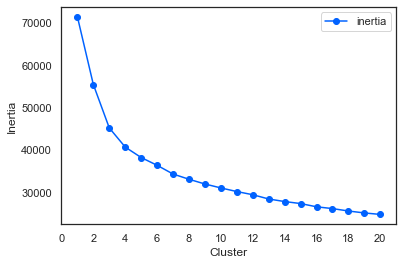

In [52]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

## Question 5

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color by reporting the number of red and white observations in each cluster for both K-means and agglomerative clustering.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [53]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

In [54]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,kmeans,agglom
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red,0,1
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red,0,1
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red,0,1
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red,0,1
4,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red,0,1


In [55]:
# First, for Agglomerative Clustering:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

In [56]:
# Comparing with KMeans results:
(data[['color','agglom','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [57]:
# Comparing results:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

Though the cluster numbers are not identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

In [58]:
ag.children_.shape

(6496, 2)

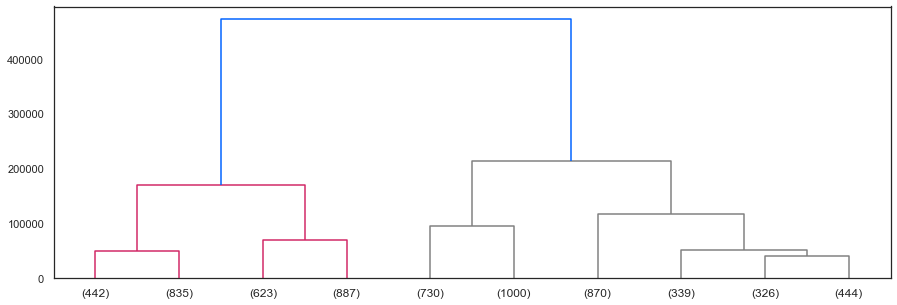

In [59]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = colors[2]
blue = colors[0]

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=10, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)
### END SOLUTION

In [60]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
agx = AgglomerativeClustering().fit(X)

In [61]:
agx.children_

array([[0, 1],
       [3, 5],
       [2, 6],
       [4, 7],
       [8, 9]], dtype=int64)

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

* Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
* Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
* For both datasets, using __[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)__ with 10 splits, fit 10 Random Forest Classifiers and find the mean of the ROC-AUC scores from these 10 classifiers.
* Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

### BEGIN SOLUTION
y = (data['quality'] > 7).astype(int)
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
# return classification_report(y_test, y_predicted)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9100119047619046"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9123769841269841"


Let's now explore if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a KMeans algorithim with $n$ clusters. __[One-hot encode]()__ it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

C:\Users\moon\AppData\Local\Temp/ipykernel_21228/985726238.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


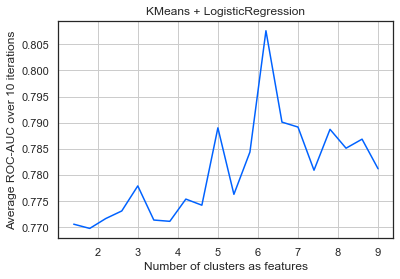

In [63]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation